In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

___
### Étape 1 : Chargement de l'ensemble de données
Dans cette étape, nous allons charger l'ensemble de données Wine Quality à partir de l'URL fournie à l'aide de Pandas, une puissante bibliothèque de manipulation de données en Python.

In [19]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

print("Data sample:")
print(data.head())

Data sample:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      

__Explication :__ Nous utilisons la fonction read_csv de la bibliothèque Pandas pour charger l'ensemble de données dans un DataFrame. Le sep=';' Le paramètre spécifie que l'ensemble de données est séparé par des points-virgules. Nous affichons ensuite les premières lignes de l'ensemble de données pour comprendre sa structure et son contenu.
___

### Étape 2 : Analyse statistique de base
Au cours de cette étape, nous effectuerons une analyse statistique de base de l'ensemble de données pour mieux comprendre ses caractéristiques numériques.

In [20]:
print("\nStatistical summary:")
print(data.describe())


Statistical summary:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000        

__Explication :__ Nous utilisons la fonction décrire pour générer des statistiques descriptives des colonnes numériques de l'ensemble de données. Cela inclut des mesures telles que la moyenne, l’écart type, le minimum, le maximum et les quartiles.
___

### Étape 3 : Vérification des valeurs manquantes
Dans cette étape, nous vérifierons s'il manque des valeurs dans l'ensemble de données.

In [21]:
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


__Explication :__ Nous utilisons la fonction isnull pour identifier les valeurs manquantes dans l'ensemble de données, puis utilisons sum pour compter le nombre de valeurs manquantes pour chaque colonne. Cela nous aide à déterminer si une imputation de données ou un traitement des valeurs manquantes est nécessaire.
___

### Étape 4 : Visualiser la distribution de la variable cible
Dans cette étape, nous allons visualiser la distribution de la variable cible, qui dans ce cas est la qualité du vin.

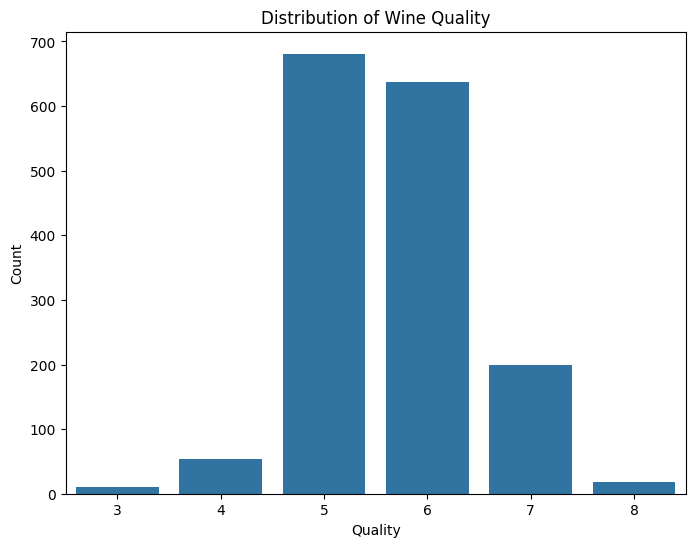

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=data)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

__Explication :__ Nous utilisons la fonction countplot de la bibliothèque Seaborn pour créer un graphique à barres de la distribution des notes de qualité du vin. Cette visualisation nous aide à comprendre la répartition des qualités du vin dans l'ensemble de données.
___

### Étape 5 : Visualiser les corrélations entre les fonctionnalités
Dans cette étape, nous visualiserons les corrélations entre les différentes caractéristiques de l'ensemble de données à l'aide d'une carte thermique.

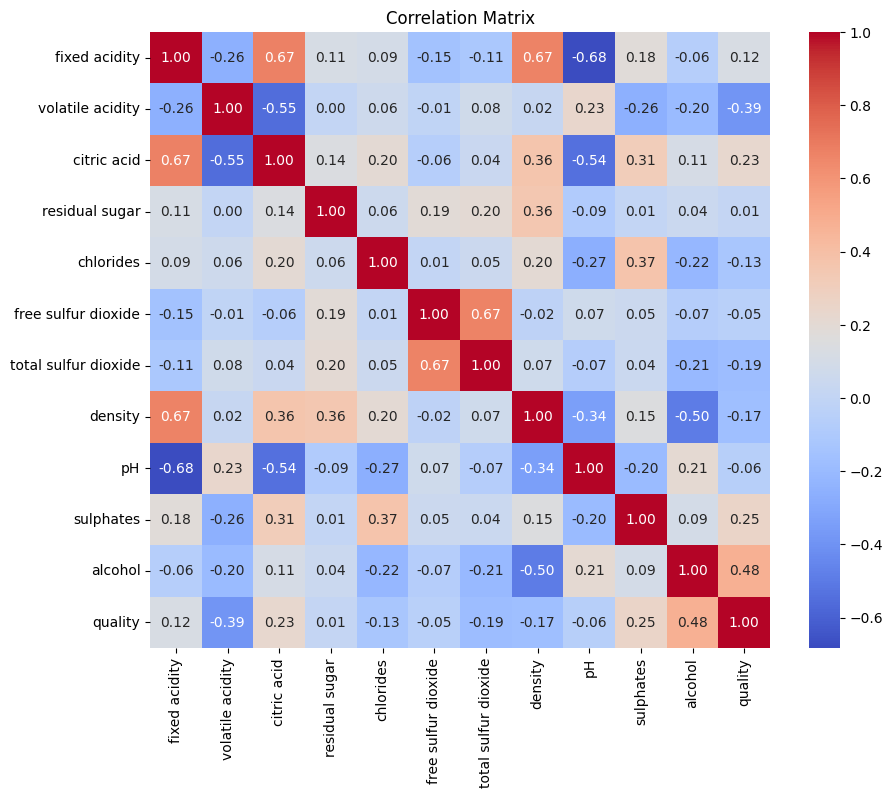

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

__Explication :__ Nous utilisons la fonction heatmap de Seaborn pour créer une heatmap de la matrice de corrélation entre les différentes caractéristiques de l'ensemble de données. Cette visualisation nous aide à identifier les relations et les dépendances entre les différentes caractéristiques.
___

### Étape 6 : Prétraitement des données
Dans cette étape, nous allons prétraiter les données en standardisant les fonctionnalités.

In [24]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop('quality', axis=1))

__Explication :__ Nous utilisons la classe StandardScaler de scikit-learn pour standardiser les caractéristiques numériques de l'ensemble de données. La standardisation garantit que chaque fonctionnalité a une moyenne de 0 et un écart type de 1, ce qui est une exigence courante pour de nombreux algorithmes d'apprentissage automatique.
___

### Étape 7 : Réduction de la dimensionnalité avec PCA
Dans cette étape, nous effectuerons une réduction de dimensionnalité à l’aide de l’analyse en composantes principales (ACP).

In [25]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

__Explication :__ Nous utilisons la classe PCA de scikit-learn pour effectuer une analyse en composantes principales (ACP) sur les données standardisées. La PCA réduit la dimensionnalité de l'ensemble de données tout en préservant autant de variance que possible.
___

### Étape 8 : Clustering avec K-means
Dans cette étape, nous appliquerons l'algorithme de clustering K-means pour identifier les regroupements naturels au sein des données.

In [26]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
kmeans_labels = kmeans.fit_predict(scaled_data)

__Explication :__ Nous utilisons la classe KMeans de scikit-learn pour appliquer l'algorithme de clustering K-means aux données standardisées. K-means divise les données en n_clusters en fonction de la similarité.
___

### Étape 9 : Évaluation des performances du clustering
Dans cette étape, nous évaluerons les performances du clustering à l’aide du score silhouette.

In [27]:
silhouette_avg = silhouette_score(scaled_data, kmeans_labels)
print("\nSilhouette Score:", silhouette_avg)


Silhouette Score: 0.16546359497350785


__Explication :__ Nous utilisons la fonction silhouette_score de scikit-learn pour calculer le score silhouette, qui mesure la qualité du clustering. Un score de silhouette plus élevé indique de meilleures performances de clustering.
___

### Étape 10 : Visualisation des clusters
Dans cette étape, nous visualiserons les clusters dans les dimensions réduites obtenues par PCA.

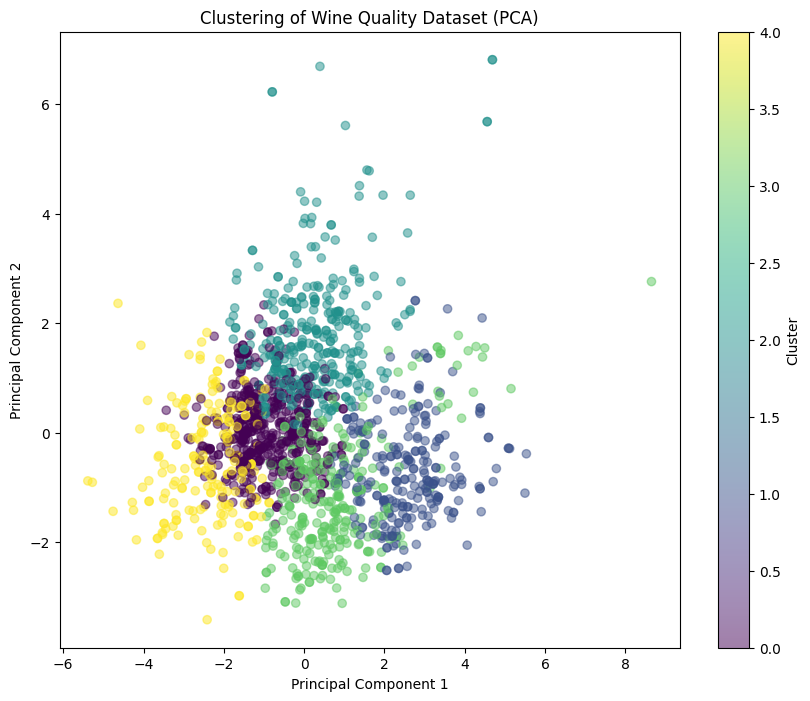

In [28]:
plt.figure(figsize=(10, 8))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.title('Clustering of Wine Quality Dataset (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

__Explication :__ Nous utilisons un nuage de points pour visualiser les clusters dans les dimensions réduites obtenues par PCA. Chaque point représente un échantillon de vin et la couleur indique l'étiquette de cluster qui lui est attribuée.
___

### Conclusion
Dans cette analyse, nous avons exploré l'ensemble de données Wine Quality à l'aide de diverses techniques d'exploration de données et d'apprentissage non supervisé. Nous avons visualisé la distribution des qualités du vin, analysé les corrélations entre différentes caractéristiques et appliqué des algorithmes de réduction de dimensionnalité et de regroupement pour identifier des modèles au sein de l'ensemble de données. Le score silhouette a été utilisé pour évaluer les performances de regroupement et les résultats ont été visualisés en deux dimensions à l'aide de la PCA. Cette analyse fournit un aperçu de la structure de l'ensemble de données sur la qualité du vin et démontre l'application de techniques d'apprentissage non supervisé pour l'analyse exploratoire des données.